In [9]:
import re
import sys
from pyspark import SparkConf, SparkContext
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [10]:
conf = SparkConf()
sc = SparkContext(conf=conf)

ValueError: Cannot run multiple SparkContexts at once; existing SparkContext(app=pyspark-shell, master=local[*]) created by __init__ at <ipython-input-2-516e7cb251a1>:2 

In [3]:
data_m = np.matrix(np.loadtxt("/Users/januaryshen/Dropbox/S19 - CSE 547/hw2/q2/data/data.txt"), dtype = float)
c1_m = np.matrix(np.loadtxt("/Users/januaryshen/Dropbox/S19 - CSE 547/hw2/q2/data/c1.txt"), dtype = float)
c2_m = np.matrix(np.loadtxt("/Users/januaryshen/Dropbox/S19 - CSE 547/hw2/q2/data/c2.txt"), dtype = float)

data_rdd = sc.parallelize(data_m)
c1_rdd = sc.parallelize(c1_m)
c2_rdd = sc.parallelize(c2_m)

In [5]:
MAX_ITER = 20
cost_euclid_list_c1 = list()
cost_euclid_list_c2 = list()

for n in range(MAX_ITER):
    cost_euclid_c1 = 0
    cost_euclid_c2 = 0
    cluster_list_c1 = list()
    cluster_list_c2 = list()
    
    for i in range(len(data_m)):
        distance_c1 = float("inf")
        distance_c2 = float("inf")
        
        for j in range(len(c1_m)):
            if np.sqrt(np.square(data_m[i]-c1_m[j]).sum()) <= distance_c1:
                distance_c1 = np.sqrt(np.square(data_m[i]-c1_m[j]).sum())
                c1_index = j
            if np.sqrt(np.square(data_m[i]-c2_m[j]).sum()) <= distance_c2:
                distance_c2 = np.sqrt(np.square(data_m[i]-c2_m[j]).sum())
                c2_index = j
        
        cost_euclid_c1 += distance_c1
        cost_euclid_c2 += distance_c2
        cluster_list_c1.append((c1_index, i))
        cluster_list_c2.append((c2_index, i))
    
    for k in range(10):
        target_index_c1 = list()
        target_index_c2 = list()
        centroid_c1 = 0
        centroid_c2 = 0
        for l in range(len(cluster_list_c1)):
            if cluster_list_c1[l][0] == k:
                target_index_c1.append(l)
        for l in range(len(cluster_list_c2)):
            if cluster_list_c2[l][0] == k:
                target_index_c2.append(l)
        
        for m in target_index_c1:
            centroid_c1 += data_m[m]
        c1_m[k] = centroid_c1/len(target_index_c1) 
        for m in target_index_c2:
            centroid_c2 += data_m[m]
        c2_m[k] = centroid_c2/len(target_index_c2) 
        
    cost_euclid_list_c1.append((n + 1, cost_euclid_c1))
    cost_euclid_list_c2.append((n + 1, cost_euclid_c2))

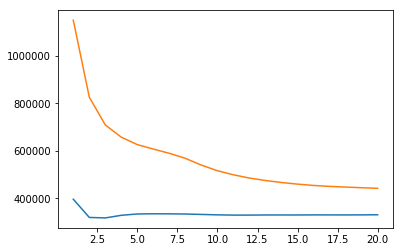

In [6]:
plt.plot(*zip(*cost_euclid_list_c1))
plt.plot(*zip(*cost_euclid_list_c2))
plt.show()

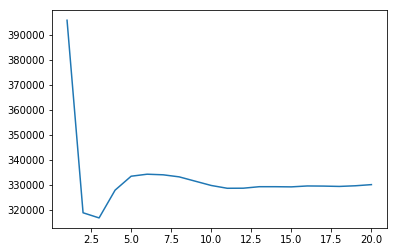

In [7]:
plt.plot(*zip(*cost_euclid_list_c1))
plt.show()

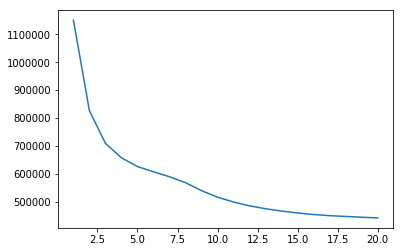

In [8]:
plt.plot(*zip(*cost_euclid_list_c2))
plt.show()